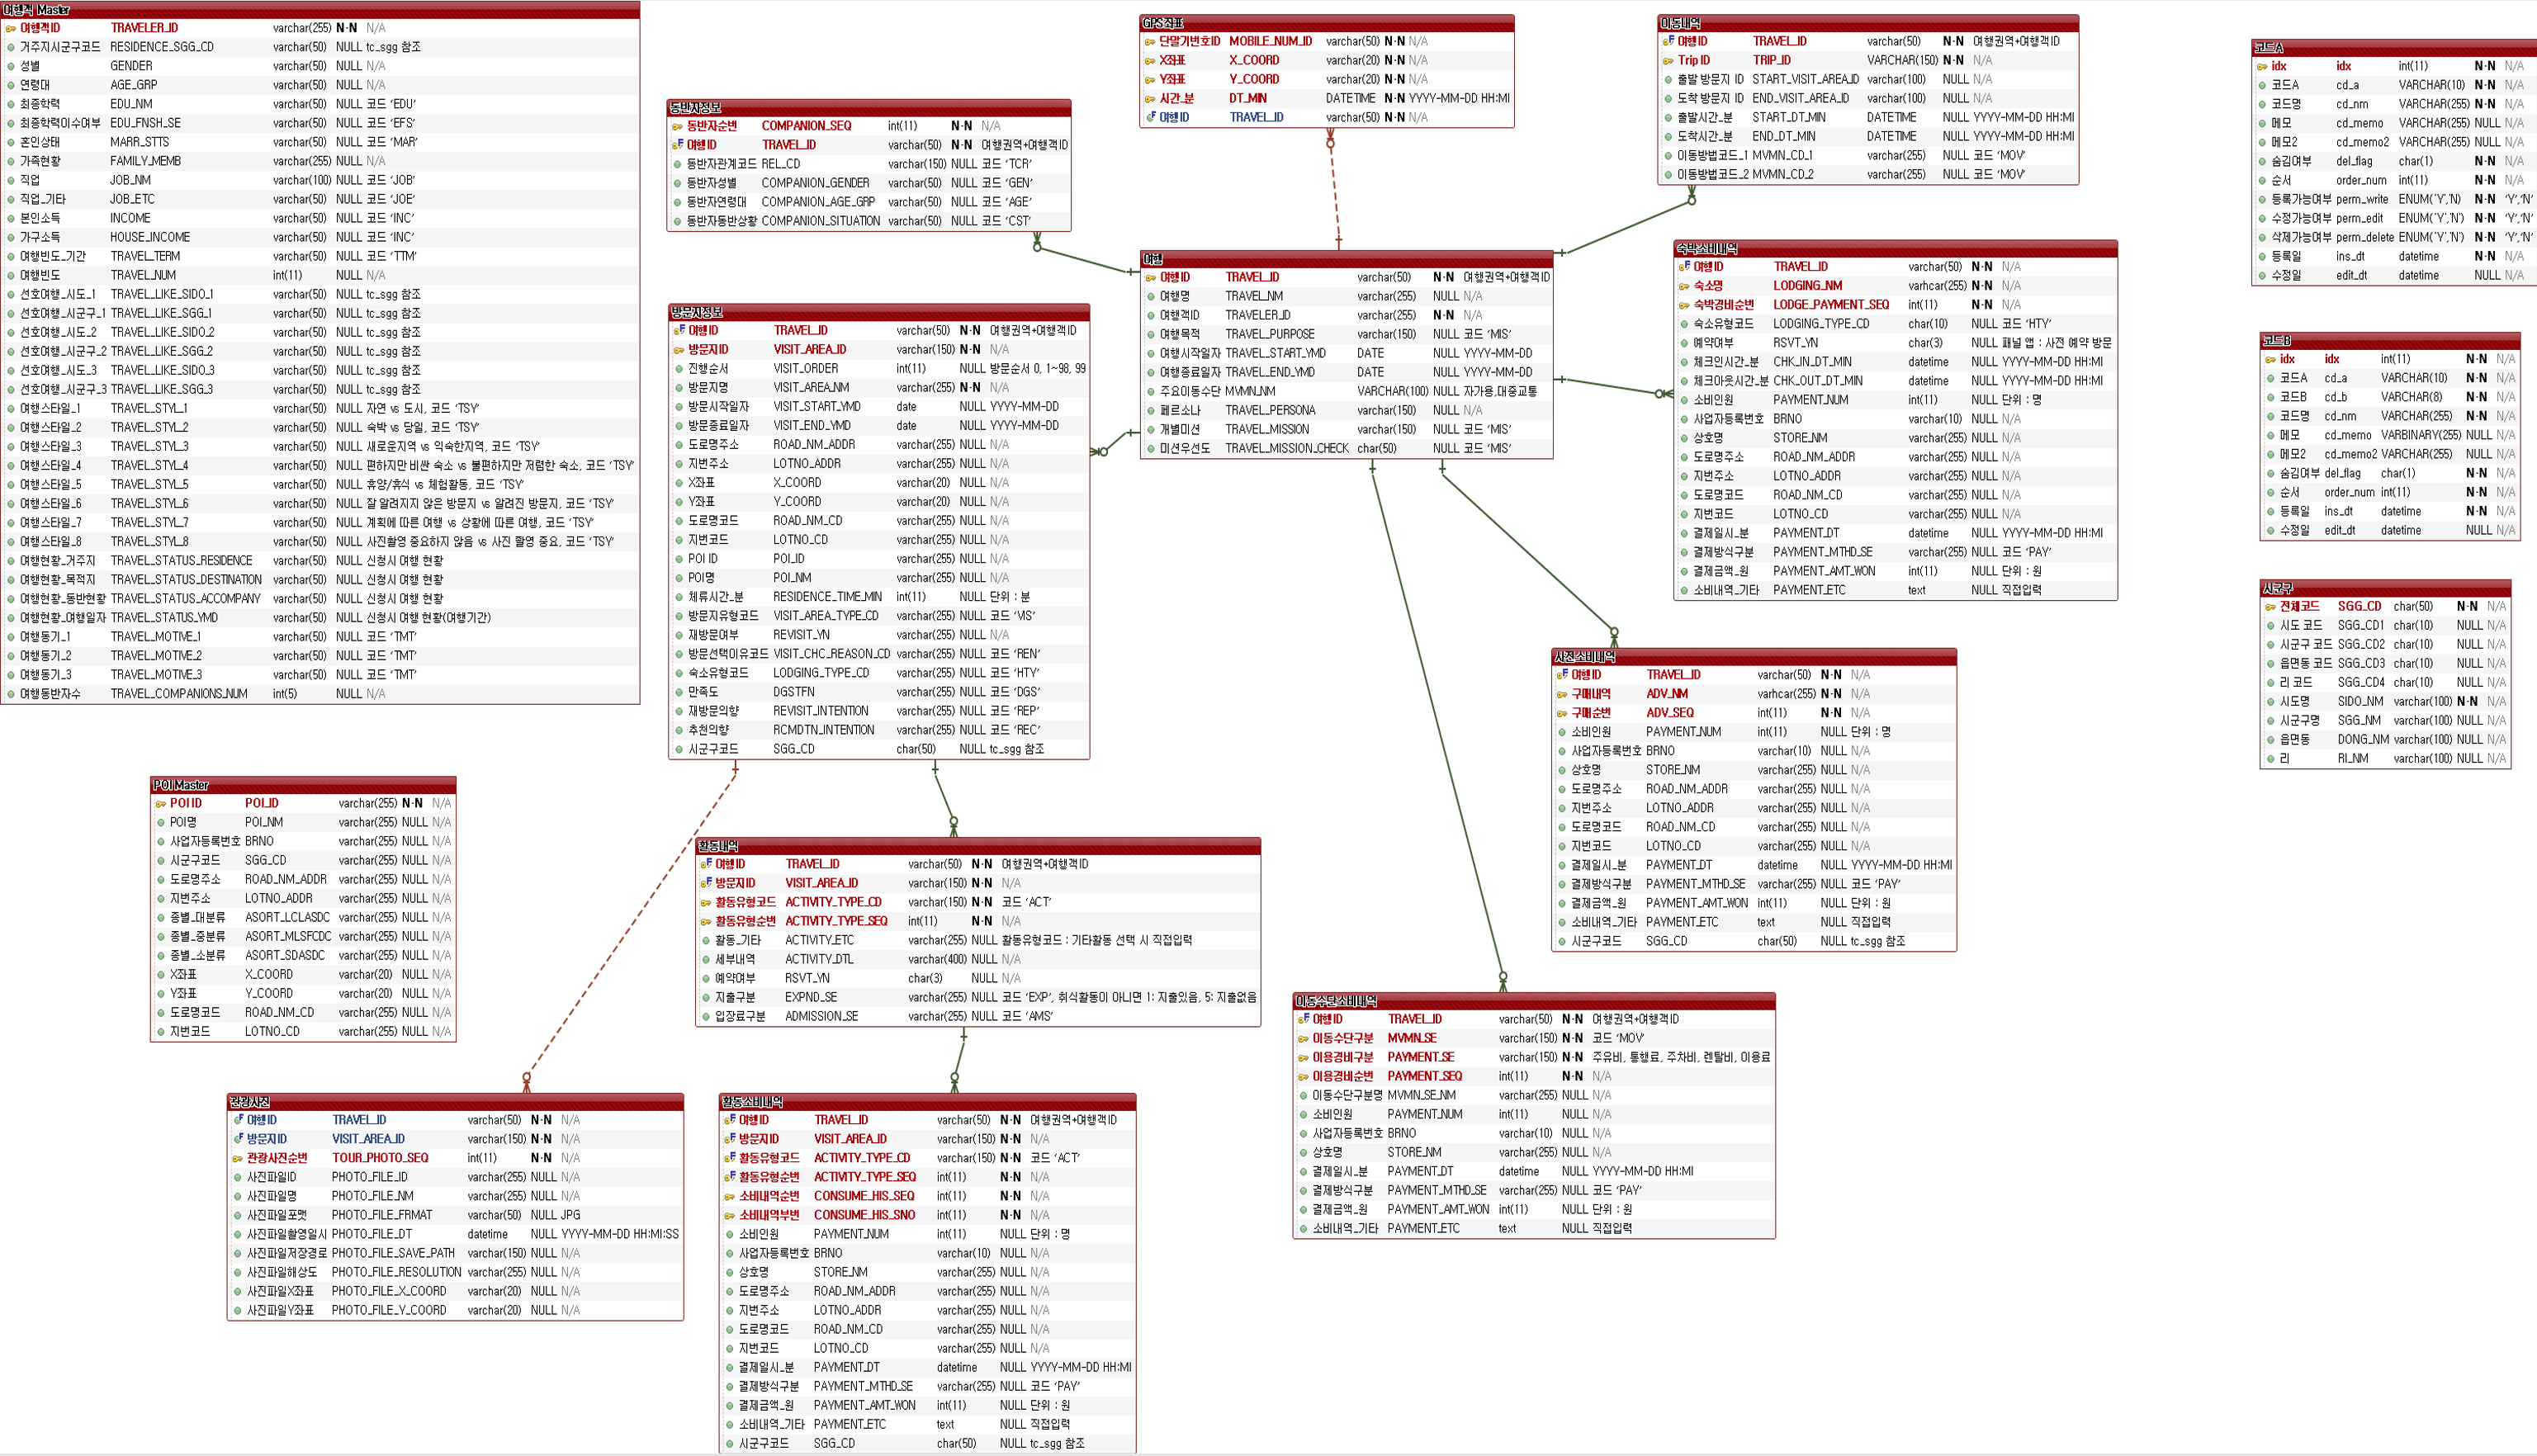

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
Train_Folder_path = "../Origin_Data/Travel/Jeju/Training/TL_csv/"
Val_Folder_path = "../Origin_Data/Travel/Jeju/Validation/VL_csv/"
Train_Path_list = []
Val_Path_list = []
for Train_File, Val_File in zip(os.listdir(Train_Folder_path), os.listdir(Val_Folder_path)):
    Train_Path_list.append(Train_Folder_path + Train_File)
    Val_Path_list.append(Val_Folder_path + Val_File)

In [4]:
def EXTRACT_DATA(File_Path_list):
    traver_csv = pd.read_csv(File_Path_list[13], encoding="utf-8-sig")
    traverer_csv = pd.read_csv(File_Path_list[12], encoding="utf-8-sig")
    visit_area_csv = pd.read_csv(File_Path_list[14], encoding="utf-8-sig");
    return [traver_csv, traverer_csv, visit_area_csv]

def MARGE_DATA(train, val):
    df = pd.concat([train, val])
    df.drop_duplicates()
    return df;

In [5]:
train_csv_list = EXTRACT_DATA(Train_Path_list)
val_csv_list = EXTRACT_DATA(Val_Path_list)

marge_df_list = []

for train, val in zip(train_csv_list, val_csv_list):
    marge_df_list.append(MARGE_DATA(train, val))

C:\Users\MSI\AppData\Local\Temp\ipykernel_8468\2230415850.py:4: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_area_csv = pd.read_csv(File_Path_list[14], encoding="utf-8-sig");


In [6]:
travel = marge_df_list[0].copy()
tarveler = marge_df_list[1].copy()
visit = marge_df_list[2].copy()

# 여행 DB
|필드|설명|비고|
|--|--|--|
|TRAVEL_ID|여행ID|여행권역_여행객ID|
|TRAVEL_NM|여행명||
|TRAVELER_ID|여행객명||
|TRAVEL_PURPOSE|여행목적|코드 MIS|
|TRAVEL_START_YMD|여행시작일자||
|TRAVEL_END_YMD|여행종료일자||
|MVMN_NM|이동수단||
|TRAVEL_PERSONA|페르소나||

In [7]:
drop_columns = ["TRAVEL_MISSION", "TRAVEL_MISSION_CHECK"]
travel = travel.drop(columns=drop_columns)
travel

### 전처리 과정

In [8]:
import numpy as np

code_csv = pd.read_csv(Train_Path_list[1], encoding="utf-8-sig")

def TRAVEL_PURPOSE_INDEX(x):
    purpose_list = x.split(";")
    purpose_list = purpose_list[:len(purpose_list) - 1]
    purpose_transfrom_list = []
    for purpose in purpose_list:
        purpose_transfrom = code_csv["cd_nm"][(code_csv["cd_a"] == "MIS") & (code_csv["cd_b"] == purpose)]
        purpose_transfrom_list.append(purpose_transfrom)
    purpose_transfrom_list = np.concatenate(purpose_transfrom_list).tolist()
    return ",".join(purpose_transfrom_list)

travel["TRAVEL_PURPOSE"] = travel["TRAVEL_PURPOSE"].apply(TRAVEL_PURPOSE_INDEX)
travel = travel.replace({np.NaN:None})
travel

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA
0,b_b010312,D02,b010312,"쇼핑,Well-ness 여행,SNS 인생샷 여행,신규 여행지 발굴,친환경 여행(플로...",2022-10-29,2022-10-31,대중교통 등,None
1,b_b005266,D02,b005266,"Well-ness 여행,SNS 인생샷 여행,호캉스 여행,신규 여행지 발굴,인플루언서...",2022-10-12,2022-10-14,자가용,None
2,d_d000296,D01,d000296,"테마파크, 놀이시설, 동/식물원 방문",2022-08-18,2022-08-22,대중교통 등,40세 이상 자녀 동반 여행
3,d_d002565,D01,d002565,"SNS 인생샷 여행,호캉스 여행",2022-10-29,2022-11-01,자가용,None
4,d_d006390,D01,d006390,"테마파크, 놀이시설, 동/식물원 방문,SNS 인생샷 여행,시티투어,야외 스포츠, 레...",2022-10-15,2022-10-19,대중교통 등,39세 이하 3인 이상 친구
...,...,...,...,...,...,...,...,...
395,a_a008632,D02,a008632,"테마파크, 놀이시설, 동/식물원 방문,친환경 여행(플로깅 여행),시티투어,Well-...",2022-10-29,2022-10-31,자가용,None
396,d_d000998,D01,d000998,"쇼핑,테마파크, 놀이시설, 동/식물원 방문,호캉스 여행,시티투어,야외 스포츠, 레포...",2022-08-27,2022-08-30,대중교통 등,None
397,a_a000311,D02,a000311,"쇼핑,온천/스파,테마파크, 놀이시설, 동/식물원 방문,SNS 인생샷 여행,호캉스 여행",2022-08-26,2022-08-28,자가용,수도권 거주 39세 이하 3인 이상 친구
398,d_d004203,D01,d004203,"Well-ness 여행,호캉스 여행,신규 여행지 발굴,등반 여행,지역 문화예술/공연...",2022-10-08,2022-10-11,자가용,None


# 여행객 DB
### 여행객 정보 DB
|필드|설명|비고|
|--|--|--|
|TRAVELER_ID|여행객ID|여행권역_여행객ID|
|RESIDENCE_SGG_CD|거주지시군구코드|거주시csv 참조|
|GENDER|성별||
|AGE_GRP|연령대||
|EDU_NM|최종학력|코드 EDU|
|EDU_FNSH_SE|최종학력이수여부|코드 EFS|
|MARR_STTS|혼인상태|코드 MAR|
|FAMILY_MEMB|가족현황||
|JOB_NM|직업|코드 JOB|
|JOB_ETC|직업_기타|코드 JOE|
|INCOME|본인소득|코드 INC|
|HOUSE_INCOME|가족소득|코드 INC|
|TRAVEL_TERM|여행빈도_기간|코드 TTM|
|TRAVEL_NUM|여행빈도||
|TRAVEL_STATUS_START_DAY|여행현황_여행일자|TRAVEL_STATUS_YMD 분할|
|TRAVEL_STATUS_END_DAY|여행현황_여행일자|TRAVEL_STATUS_YMD 분할|
|TRAVEL_COMPANIONS_NUM|여행동반자수||

### 여행객 취향 DB
|필드|설명|비고|
|--|--|--|
|TRAVELER_ID|여행객ID|여행권역_여행객ID|
|TRAVEL_LIKE_SIDO_1|선호여행_시도_1|거주시csv 참조|
|TRAVEL_LIKE_SGG_1|선호여행_시군구_1|거주시csv 참조|
|TRAVEL_LIKE_SIDO_2|선호여행_시도_2|거주시csv 참조|
|TRAVEL_LIKE_SGG_2|선호여행_시군구_2|거주시csv 참조|
|TRAVEL_LIKE_SIDO_3|선호여행_시도_3|거주시csv 참조|
|TRAVEL_LIKE_SGG_3|선호여행_시군구_3|거주시csv 참조|
|TRAVEL_STYL_1|여행스타일1|코드 TSY|
|TRAVEL_STYL_2|여행스타일2|코드 TSY|
|TRAVEL_STYL_3|여행스타일3|코드 TSY|
|TRAVEL_STYL_4|여행스타일4|코드 TSY|
|TRAVEL_STYL_5|여행스타일5|코드 TSY|
|TRAVEL_STYL_6|여행스타일6|코드 TSY|
|TRAVEL_STYL_7|여행스타일7|코드 TSY|
|TRAVEL_STYL_8|여행스타일8|코드 TSY|
|TRAVEL_STATUS_RESIDENCE|여행현황_거주지||
|TRAVEL_STATUS_DESTINATION|여행현황_목적지||
|TRAVEL_STATUS_ACCOMPANY|여행현황_동반현황||
|TRAVEL_MOTIVE_1|여행동기1|코드TMT|

In [9]:
info_columns = list(tarveler.columns[0:14]) 
info_columns.append(tarveler.columns[-1])
info_columns.append("TRAVEL_STATUS_YMD")
person = tarveler[info_columns].copy()
person

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,INCOME,HOUSE_INCOME,TRAVEL_TERM,TRAVEL_NUM,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_YMD
0,b011774,31,여,30,6,1,1,1,3.0,NaN,4,NaN,2,1,1,2022-10-25~2022-10-26
1,d009928,29,여,20,6,2,1,4,12.0,NaN,2,6.0,3,3,1,2022-10-30~2022-11-01
2,d010131,26,남,20,7,2,1,1,12.0,NaN,3,NaN,4,2,0,2022-11-02~2022-11-04
3,d006004,50,여,20,6,1,1,1,3.0,NaN,4,NaN,2,2,1,2022-10-30~2022-10-31
4,d002965,50,여,30,6,1,2,4,3.0,NaN,1,4.0,1,1,3,2022-10-08~2022-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,d012387,50,남,40,4,1,2,2,1.0,NaN,4,4.0,3,3,0,2022-11-11~2022-11-11
396,d004823,50,남,40,6,1,1,1,2.0,NaN,5,NaN,2,1,0,2022-10-19~2022-10-21
397,d006166,11,여,50,6,1,2,3,5.0,NaN,2,5.0,2,12,2,2022-10-17~2022-10-20
398,d011757,11,남,20,6,2,1,3,12.0,NaN,3,8.0,3,2,1,2022-11-07~2022-11-09


In [10]:
faver_columns = []
faver_columns.append(tarveler.columns[0])
faver_columns.extend(list(tarveler.columns[14:-3]))
faver_columns.remove("TRAVEL_STATUS_YMD")
faver = tarveler[faver_columns].copy()
faver

,TRAVELER_ID,TRAVEL_LIKE_SIDO_1,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SIDO_2,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SIDO_3,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE_1
0,b011774,50,50110,11,11620,26,26500,4,2,2,4,3,3,2,6,울산광역시,경남,2인 가족 여행,2
1,d009928,50,50110,26,26350,11,11680,6,1,2,3,1,6,1,7,광주광역시,제주,2인 여행(가족 외),2
2,d010131,31,31140,31,31110,11,11110,6,2,1,6,5,6,2,7,부산광역시,제주,나홀로 여행,5
3,d006004,11,11500,26,26350,50,50130,5,7,6,2,2,5,3,6,제주특별자치도,제주,2인 여행(가족 외),3
4,d002965,50,50130,27,27290,47,47110,1,7,1,1,7,7,1,4,제주특별자치도,제주,자녀 동반 여행,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,d012387,50,50110,50,50130,41,41670,1,1,5,1,1,4,7,1,제주특별자치도,제주,나홀로 여행,7
396,d004823,50,50130,50,50110,42,42150,1,1,1,1,1,1,1,4,제주특별자치도,제주,나홀로 여행,4
397,d006166,42,42150,26,26350,48,48840,2,2,3,4,2,2,6,4,서울특별시,제주,3대 동반 여행(친척 포함),2
398,d011757,50,50110,42,42720,26,26350,6,1,1,2,6,2,3,6,서울특별시,제주,2인 여행(가족 외),3


### 전처리 과정

In [11]:
sgg_csv = pd.read_csv(Train_Path_list[2], encoding="utf-8-sig")

def TRANSFOR_SGG(codeNum):
    try:
        length = len(str(int(codeNum)))  
        codeNum = codeNum * (10 ** (10 - length))
        result = " ".join(np.concatenate(sgg_csv[["SIDO_NM", "SGG_NM", "DONG_NM"]][sgg_csv["SGG_CD"] == codeNum].dropna(axis=1).values).tolist())
    except:
        result = np.NaN
    return result

def TRANSFOR_CODE(codeNum, codeName):
    try:
        codeNum = int(codeNum)
        result = code_csv["cd_nm"][(code_csv["cd_a"] == codeName) & (code_csv["cd_b"] == str(codeNum))]
        result = " ".join(result.values.tolist())
    except:
        result = np.NaN;
    return result

In [12]:
filter_columns = ["EDU_NM","EDU_FNSH_SE","MARR_STTS","JOB_NM"
              , "JOB_ETC", "INCOME", "HOUSE_INCOME","TRAVEL_TERM"]
code_columns = ["EDU","EFS","MAR","JOB","JOE","INC","INC","TTM"]

for filter, code in zip(filter_columns, code_columns):
    person[filter] = person[filter].apply(TRANSFOR_CODE, args=[code])

person["RESIDENCE_SGG_CD"] = person["RESIDENCE_SGG_CD"].apply(TRANSFOR_SGG)
people_datetime = person["TRAVEL_STATUS_YMD"].str.split("~")
person["TRAVEL_STATUS_START_DAY"] = people_datetime.str.get(0)
person["TRAVEL_STATUS_END_DAY"] = people_datetime.str.get(1)
person = person.drop(columns=["TRAVEL_STATUS_YMD"])
person = person.replace({np.NaN:None})
person

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,INCOME,HOUSE_INCOME,TRAVEL_TERM,TRAVEL_NUM,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_START_DAY,TRAVEL_STATUS_END_DAY
0,b011774,울산광역시,여,30,대학교(4년제 이상),졸업,미혼,1,사무 종사자,None,월평균 200만원 ~ 300만원 미만,None,한달,1,1,2022-10-25,2022-10-26
1,d009928,광주광역시,여,20,대학교(4년제 이상),재학,미혼,4,학생,None,월평균 100만원 미만,월평균 400만원 ~ 500만원 미만,1년,3,1,2022-10-30,2022-11-01
2,d010131,부산광역시,남,20,대학원 석사 과정,재학,미혼,1,학생,None,월평균 100만원 ~ 200만원 미만,None,기타,2,0,2022-11-02,2022-11-04
3,d006004,제주특별자치도,여,20,대학교(4년제 이상),졸업,미혼,1,사무 종사자,None,월평균 200만원 ~ 300만원 미만,None,한달,2,1,2022-10-30,2022-10-31
4,d002965,제주특별자치도,여,30,대학교(4년제 이상),졸업,기혼,4,사무 종사자,None,소득없음,월평균 200만원 ~ 300만원 미만,1주일,1,3,2022-10-08,2022-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,d012387,제주특별자치도,남,40,고등학교,졸업,기혼,2,관리자,None,월평균 200만원 ~ 300만원 미만,월평균 200만원 ~ 300만원 미만,1년,3,0,2022-11-11,2022-11-11
396,d004823,제주특별자치도,남,40,대학교(4년제 이상),졸업,미혼,1,전문가 및 관련 종사자,None,월평균 300만원 ~ 400만원 미만,None,한달,1,0,2022-10-19,2022-10-21
397,d006166,서울특별시,여,50,대학교(4년제 이상),졸업,기혼,3,판매 종사자,None,월평균 100만원 미만,월평균 300만원 ~ 400만원 미만,한달,12,2,2022-10-17,2022-10-20
398,d011757,서울특별시,남,20,대학교(4년제 이상),재학,미혼,3,학생,None,월평균 100만원 ~ 200만원 미만,월평균 600만원 ~ 700만원 미만,1년,2,1,2022-11-07,2022-11-09


In [13]:
code_columns = ["TRAVEL_LIKE_SIDO_1", "TRAVEL_LIKE_SGG_1", "TRAVEL_LIKE_SIDO_2", "TRAVEL_LIKE_SGG_2", "TRAVEL_LIKE_SIDO_3", "TRAVEL_LIKE_SGG_3"]
for code_column in code_columns:
    faver[code_column] = faver[code_column].apply(TRANSFOR_SGG)
faver["TRAVEL_MOTIVE_1"] = faver["TRAVEL_MOTIVE_1"].apply(TRANSFOR_CODE, args=["TMT"])
faver

,TRAVELER_ID,TRAVEL_LIKE_SIDO_1,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SIDO_2,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SIDO_3,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE_1
0,b011774,제주특별자치도,제주특별자치도 제주시,서울특별시,서울특별시 관악구,부산광역시,부산광역시 수영구,4,2,2,4,3,3,2,6,울산광역시,경남,2인 가족 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
1,d009928,제주특별자치도,제주특별자치도 제주시,부산광역시,부산광역시 해운대구,서울특별시,서울특별시 강남구,6,1,2,3,1,6,1,7,광주광역시,제주,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
2,d010131,울산광역시,울산광역시 남구,울산광역시,울산광역시 중구,서울특별시,서울특별시 종로구,6,2,1,6,5,6,2,7,부산광역시,제주,나홀로 여행,SNS 사진 등록 등 과시
3,d006004,서울특별시,서울특별시 강서구,부산광역시,부산광역시 해운대구,제주특별자치도,제주특별자치도 서귀포시,5,7,6,2,2,5,3,6,제주특별자치도,제주,2인 여행(가족 외),여행 동반자와의 친밀감 및 유대감 증진
4,d002965,제주특별자치도,제주특별자치도 서귀포시,대구광역시,대구광역시 달서구,경상북도,NaN,1,7,1,1,7,7,1,4,제주특별자치도,제주,자녀 동반 여행,여행 동반자와의 친밀감 및 유대감 증진
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,d012387,제주특별자치도,제주특별자치도 제주시,제주특별자치도,제주특별자치도 서귀포시,경기도,경기도 여주시,1,1,5,1,1,4,7,1,제주특별자치도,제주,나홀로 여행,새로운 경험 추구
396,d004823,제주특별자치도,제주특별자치도 서귀포시,제주특별자치도,제주특별자치도 제주시,강원도,강원도 강릉시,1,1,1,1,1,1,1,4,제주특별자치도,제주,나홀로 여행,진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기
397,d006166,강원도,강원도 강릉시,부산광역시,부산광역시 해운대구,경상남도,경상남도 남해군,2,2,3,4,2,2,6,4,서울특별시,제주,3대 동반 여행(친척 포함),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
398,d011757,제주특별자치도,제주특별자치도 제주시,강원도,강원도 홍천군,부산광역시,부산광역시 해운대구,6,1,1,2,6,2,3,6,서울특별시,제주,2인 여행(가족 외),여행 동반자와의 친밀감 및 유대감 증진


# 방문지 정보 DB
|필드|설명|비고|
|--|--|--|
|VISIT_AREA_ID|방문지ID||
|TRAVEL_ID|여행ID|여행권역_여행객ID|
|VISIT_ORDER|진행순서|방문순서 0, 1~98, 99|
|VISIT_AREA_NM|방문지명||
|VISIT_START_YMD|방문시작일자||
|VISIT_END_YMD|방문종료일자||
|ROAD_NM_ADDR|도로명주소||
|LOTNO_ADDR|도로명코드||
|X_COORD|경도||
|Y_COORD|위도||
|RESIDENCE_TIME_MIN|체류시간_분||
|VISIT_AREA_TYPE_CD|방문지유형코드|코드 VIS|
|REVISIT_YN|재방문여부||
|VISIT_CHC_REASON_CD|방문선택이유코드|코드 REN|
|DGSTFN|만족도|코드 DGS|
|REVISIT_INTENTION|재방문의향|코드 REP|
|RCMDTN_INTENTION|추천의향|코드 REC|

In [14]:
drop_columns = ["ROAD_NM_CD", "LOTNO_CD","POI_ID", "POI_NM","LODGING_TYPE_CD","SGG_CD"]
visit = visit.drop(columns=drop_columns)
visit

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION
0,2210210002,d_d006731,7,미스틱3도,2022-10-21,2022-10-21,제주특별자치도 제주시 1100로 2894-49,제주특별자치도 제주시 노형동 291-10,126.487556,33.449947,60.0,13,N,2.0,5.0,5.0,5.0
1,2210180004,d_d002613,3,에스제이렌트카,2022-10-18,2022-10-18,제주특별자치도 제주시 오일장중길 100,제주특별자치도 제주시 도두일동 1286-1,126.477007,33.498441,30.0,10,N,2.0,4.0,4.0,4.0
2,2209030004,d_d001011,20,루프탑정원,2022-09-03,2022-09-03,NaN,NaN,126.745408,33.28386,60.0,24,N,2.0,2.0,1.0,2.0
3,2209170005,d_d001386,17,법환식당,2022-09-17,2022-09-17,제주특별자치도 서귀포시 이어도로 1046,제주특별자치도 서귀포시 서호동 128-7,126.522849,33.245022,30.0,11,N,9.0,5.0,4.0,5.0
4,2210090001,d_d002308,16,돌카롱 중문점,2022-10-09,2022-10-09,제주특별자치도 서귀포시 중문로41번길 8,제주특별자치도 서귀포시 중문동 1588-1,126.424303,33.255724,30.0,11,N,2.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,2210120003,a_a006200,12,카페솔트,2022-10-12,2022-10-12,인천 강화군 강화읍 강화대로404번길 9,인천 강화군 강화읍 관청리 175-1,126.487051,37.746825,30.0,11,N,1.0,5.0,5.0,5.0
7780,2210230004,d_d002036,20,진고복식당 제주공항점,2022-10-23,2022-10-23,제주특별자치도 제주시 공항로 2,제주특별자치도 제주시 용담이동 2002,126.493493,33.506884,30.0,11,N,9.0,5.0,5.0,5.0
7781,2210280004,d_d009206,5,금호리조트 제주아쿠아나,2022-10-28,2022-10-28,제주특별자치도 서귀포시 남원읍 태위로 522-12,제주특별자치도 서귀포시 남원읍 남원리 2384-1,126.701433,33.272645,300.0,6,N,7.0,4.0,4.0,4.0
7782,2210100002,d_d004325,7,김영갑갤러리두모악,2022-10-10,2022-10-10,제주특별자치도 서귀포시 성산읍 삼달로 137,제주특별자치도 서귀포시 성산읍 삼달리 437-5,126.854136,33.371895,30.0,3,N,1.0,5.0,4.0,5.0


In [15]:
code_list = ["VIS", "REN"]
change_columns = ["VISIT_AREA_TYPE_CD", "VISIT_CHC_REASON_CD"]
for code, change_column in zip(code_list, change_columns):
    visit[change_column] = visit[change_column].apply(TRANSFOR_CODE, args=[code])
visit = visit.replace({np.NaN:None})
visit

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION
0,2210210002,d_d006731,7,미스틱3도,2022-10-21,2022-10-21,제주특별자치도 제주시 1100로 2894-49,제주특별자치도 제주시 노형동 291-10,126.487556,33.449947,60.0,체험 활동 관광지,N,"온라인(SNS, 블로그 등) 평가가 좋아서",5.0,5.0,5.0
1,2210180004,d_d002613,3,에스제이렌트카,2022-10-18,2022-10-18,제주특별자치도 제주시 오일장중길 100,제주특별자치도 제주시 도두일동 1286-1,126.477007,33.498441,30.0,상점,N,"온라인(SNS, 블로그 등) 평가가 좋아서",4.0,4.0,4.0
2,2209030004,d_d001011,20,루프탑정원,2022-09-03,2022-09-03,None,None,126.745408,33.28386,60.0,숙소,N,"온라인(SNS, 블로그 등) 평가가 좋아서",2.0,1.0,2.0
3,2209170005,d_d001386,17,법환식당,2022-09-17,2022-09-17,제주특별자치도 서귀포시 이어도로 1046,제주특별자치도 서귀포시 서호동 128-7,126.522849,33.245022,30.0,식당/카페,N,지나가다 우연히,5.0,4.0,5.0
4,2210090001,d_d002308,16,돌카롱 중문점,2022-10-09,2022-10-09,제주특별자치도 서귀포시 중문로41번길 8,제주특별자치도 서귀포시 중문동 1588-1,126.424303,33.255724,30.0,식당/카페,N,"온라인(SNS, 블로그 등) 평가가 좋아서",4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,2210120003,a_a006200,12,카페솔트,2022-10-12,2022-10-12,인천 강화군 강화읍 강화대로404번길 9,인천 강화군 강화읍 관청리 175-1,126.487051,37.746825,30.0,식당/카페,N,지명도/명소/핫플레이스,5.0,5.0,5.0
7780,2210230004,d_d002036,20,진고복식당 제주공항점,2022-10-23,2022-10-23,제주특별자치도 제주시 공항로 2,제주특별자치도 제주시 용담이동 2002,126.493493,33.506884,30.0,식당/카페,N,지나가다 우연히,5.0,5.0,5.0
7781,2210280004,d_d009206,5,금호리조트 제주아쿠아나,2022-10-28,2022-10-28,제주특별자치도 서귀포시 남원읍 태위로 522-12,제주특별자치도 서귀포시 남원읍 남원리 2384-1,126.701433,33.272645,300.0,"테마시설(놀이공원, 워터파크)",N,편의시설/서비스가 좋아서,4.0,4.0,4.0
7782,2210100002,d_d004325,7,김영갑갤러리두모악,2022-10-10,2022-10-10,제주특별자치도 서귀포시 성산읍 삼달로 137,제주특별자치도 서귀포시 성산읍 삼달리 437-5,126.854136,33.371895,30.0,"문화 시설(공연장, 영화관, 전시관 등)",N,지명도/명소/핫플레이스,5.0,4.0,5.0


In [16]:
Save_path = "../Origin_Data/Result/"
travel.to_csv(Save_path + "AIHUB_travel_DB.csv", index=False, encoding="utf-8-sig")
person.to_csv(Save_path + "AIHUB_person_info_DB.csv", index=False, encoding="utf-8-sig")
faver.to_csv(Save_path + "AIHUB_faver_info_DB.csv", index=False, encoding="utf-8-sig")
visit.to_csv(Save_path + "AIHUB_visit_DB.csv", index=False, encoding="utf-8-sig")